In [108]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv
import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr
from scipy.special import stdtr
import csv
import pandas as pd

import sys 
import os
sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))
from Data20200706 import *

In [121]:
def Mz_T1 (t,T1,M0):
    Mz = M0*(1-np.exp(-t/T1)) 
    return Mz
def Mz_IR(t,T1,M0,IR):
    #Mz = M0*(1-np.exp(-t/T1) + 2*np.exp(IR/T1))
    Mz = M0*(1-2*np.exp(-t/T1))
    return Mz

# general T2 decay
def Mx_GRE(t,T2star,M0):
    Mx = M0*np.exp(-t/T2star)
    return Mx

# SE regrowth post 180 at T2p
def Mx_SE(t,T2,T2p,M0):
    x = T2*T2p/(2*T2p-1) #from 8/11/22 attempt to solve for exponential needed
    Mx = M0*np.exp(-t/x)
    return Mx

# and T1 > T2 

# IR Sequence

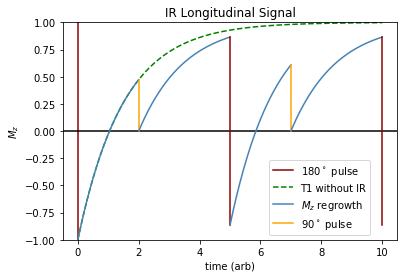

In [131]:
# first 180 degree pulse

line1y = np.linspace(-1,1,5)
line1x = 0*np.ones(5)
pl.plot(line1x,line1y,color = 'darkred',label = '$180^\circ$ pulse')

# x axis
pl.axhline(y = 0,color = 'black')

# whole regrowth if no IR
ts2 = np.linspace(0,10,200) #for 4 seconds
Mz = Mz_IR(ts2,1.5,1,2)
pl.plot(ts2,Mz,linestyle = '--',color = 'green',label = 'T1 without IR')

# regrowth with IR, ended at 2 s
ts1 = np.linspace(0,2,200) #for 2 seconds
Mz = Mz_IR(ts1,1.5,1,2)
pl.plot(ts1,Mz,color = 'steelblue',label ='$M_z$ regrowth')

# the IR pulse
line1y = np.linspace(0,Mz[-1],5)
line1x = 2*np.ones(5)
pl.plot(line1x,line1y,color = 'orange',label = '$90^\circ$ pulse')

# regrowth after IR
ts1 = np.linspace(0,3,200) #for 3 seconds
Mz = Mz_T1(ts1,1.5,1)
pl.plot(ts1+2,Mz,color = 'steelblue')

# The 180 degree at TR
line1y = np.linspace(-Mz[-1],Mz[-1],5)
line1x = 5*np.ones(5)
pl.plot(line1x,line1y,color = 'darkred')

# regrowth with IR in second 
ts1 = np.linspace(0,2,200) #for 2 seconds
Mz2 = Mz_IR(ts1,1.5,1,2)
Mz2 = Mz2-(Mz2[0] + Mz[-1])
pl.plot(ts1+5,Mz2,color = 'steelblue')

# the IR pulse
line1y = np.linspace(0,Mz2[-1],5)
line1x = 7*np.ones(5)
pl.plot(line1x,line1y,color = 'orange')

# regrowth after IR
ts1 = np.linspace(0,3,200) #for 2 seconds
Mz = Mz_T1(ts1,1.5,1)
pl.plot(ts1+7,Mz,color = 'steelblue')


# The 180 degree at TR
line1y = np.linspace(-Mz[-1],Mz[-1],5)
line1x = 10*np.ones(5)
pl.plot(line1x,line1y,color = 'darkred')



pl.title('IR Longitudinal Signal')
pl.xlabel('time (arb)')
pl.ylabel('$M_z$')
pl.ylim(-1,1)
pl.legend(loc='lower left', bbox_to_anchor=(0.6, 0))
pl.savefig('/Users/neuroimaging/Desktop/IRattempt.png',format = 'png', dpi = 120)
pl.show()

# GRE Sequence

$$ \frac{1}{T2*} = \frac{1}{T2} \frac{1}{T2'}$$

So say $T2* = .36$ and $T2 = 1.2$ and $T1 = 1.5$
Then $T2' = .3$, as 
$$ \frac{1}{.36} = \frac{1}{1.2} \frac{1}{.3}$$

So $$T2* = .36$$
$$T2' = .3$$
$$T2 = 1.2$$




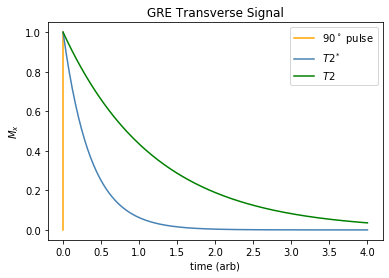

In [123]:

# First 90 degree pulse
line1y = np.linspace(0,1,5)
line1x = 0*np.ones(5)
pl.plot(line1x,line1y,color = 'orange',label = '$90^\circ$ pulse')

# T2star
ts2 = np.linspace(0,4,200) #for 4 seconds
Mx = Mx_GRE(ts2,.36,1)
pl.plot(ts2,Mx,color = 'steelblue',label = '$T2^*$')

# T2
ts2 = np.linspace(0,4,200) #for 4 seconds
Mx = Mx_GRE(ts2,1.2,1)
pl.plot(ts2,Mx,color = 'green',label = '$T2$')



pl.ylabel('$M_x$')
pl.xlabel('time (arb)')
pl.title('GRE Transverse Signal')
pl.legend()
pl.savefig('/Users/neuroimaging/Desktop/GREattempt.png',format = 'png',dpi = 120)
pl.show()

# SE

In [124]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

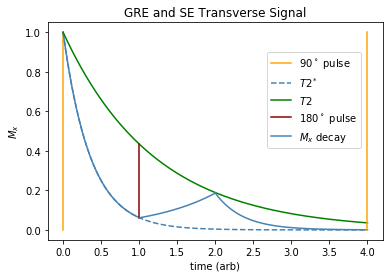

In [130]:

# First 90 degree pulse
line1y = np.linspace(0,1,5)
line1x = 0*np.ones(5)
pl.plot(line1x,line1y,color = 'orange',label = '$90^\circ$ pulse')

# T2star
ts2 = np.linspace(0,1,200) #for 1 seconds
Mxstar1 = Mx_GRE(ts2,.36,1)
pl.plot(ts2,Mxstar1,color = 'steelblue')
ts2 = np.linspace(0,4,200) #for 4 seconds
Mxstar = Mx_GRE(ts2,.36,1)
pl.plot(ts2,Mxstar,color = 'steelblue',label = '$T2^*$',linestyle = '--')

# T2
ts2 = np.linspace(0,4,200) #for 4 seconds
Mx = Mx_GRE(ts2,1.2,1)
pl.plot(ts2,Mx,color = 'green',label = '$T2$')

# the 180 degree pulse
# find of T2 and T2* at time of 180 degree pulse
idx = find_nearest(ts2,1) #say 180 pulse is at 1s
line1y = np.linspace(Mxstar[idx],Mx[idx],5)
line1x = 1*np.ones(5)
pl.plot(line1x,line1y,color = 'darkred',label = '$180^\circ$ pulse')

# the regrowth due to SE
ts2 = np.linspace(0,1,200) #for 4 seconds
Mx = Mx_SE(ts2,1.2,.3,Mxstar[idx])
pl.plot(ts2+1,Mx,color = 'steelblue',label = '$M_x$ decay')


#decay after that echo
ts2 = np.linspace(0,2,200) #for 4 seconds
Mxstar = Mx_GRE(ts2,.36,Mx[-1])
pl.plot(ts2+2,Mxstar,color = 'steelblue')

# Last 90 degree pulse
line1y = np.linspace(0,1,5)
line1x = 4*np.ones(5)
pl.plot(line1x,line1y,color = 'orange')

pl.ylabel('$M_x$')
pl.xlabel('time (arb)')
pl.title('GRE and SE Transverse Signal')
pl.legend(loc='lower left', bbox_to_anchor=(0.64, .4))
pl.savefig('/Users/neuroimaging/Desktop/SEattempt.png',format = 'png',dpi = 120)
pl.show()

# SE regrowth post 180 at T2p

### Explanation of the equation in function Mx_SE(t,T2,T2p,M0):
    
This comes from assuming the regrowth is exponential 
$$ S = M_0 e^{-t/X}$$

We know that at time $t = 0$ of the exponential groweth (which is at TE/2, the time of 180 degree pulse) that this signal is equal to the T2* decay at that time. 

$$ S(t=0) = M_0 e^{TE/2T2*} = M_0 e^{0}$$

And we know the end point at TE is equal to the T2 decay at time TE, while the exponential growth has been for TE/2. 
$$ S(t = TE/2) = M_0 e^{TE/T2} $$


Combining these two we get 

$$ S(TE/2) = M_0 e^{TE/2T2*} e^{-(TE/2)/X} = M_0 e^{TE/T2} $$

$$ -TE/2T2* + TE/2X = TE/T2$$

Solving this for X and knowing that $\frac{1}{T2*} = \frac{1}{T2}\frac{1}{T2'}$ returns 
$$ X = \frac{T2*}{2T2'-1}$$

Therefore, plugging this into $S(t)$ we get

$$ S(t) = M_0 e^{TE/2T2*} e^{-t\frac{2T2'-1}{T2*}}$$
